In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load Titanic dataset from seaborn
data = sns.load_dataset('titanic')

In [5]:
# Display basic dataset overview
print("Dataset Overview:\n", data.head())
print("\nDataset Information:\n")
data.info()

Dataset Overview:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -----------

In [6]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Handle missing values
data['age'] = data['age'].fillna(data['age'].median())  # Fill missing age with median
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])  # Fill missing embark_town with mode

In [8]:
# Drop 'deck' column if it exists (too many missing values)
data.drop(columns=['deck'], inplace=True, errors='ignore')

# Drop unnecessary columns
data.drop(columns=['alive', 'class'], inplace=True, errors='ignore')

In [9]:
# Encode categorical variables
encoder = LabelEncoder()
for col in ['sex', 'embark_town', 'who', 'embarked']:
    data[col] = encoder.fit_transform(data[col])  # Encode categorical columns

In [10]:
# Select features and target variable
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embark_town']
target = 'survived'

X = data[features]
y = data[target]

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[90 15]
 [20 54]]


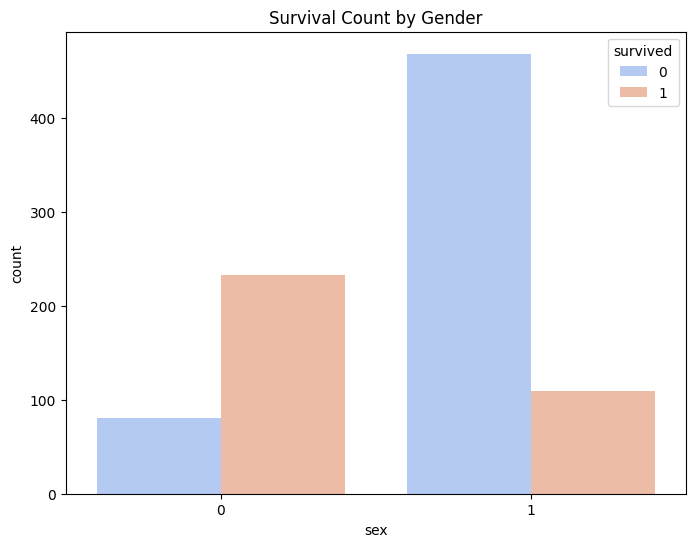

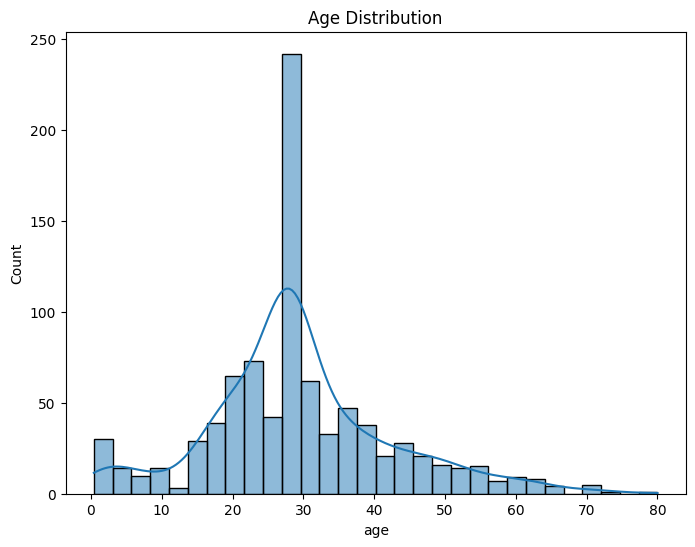

In [16]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=data, palette='coolwarm')
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

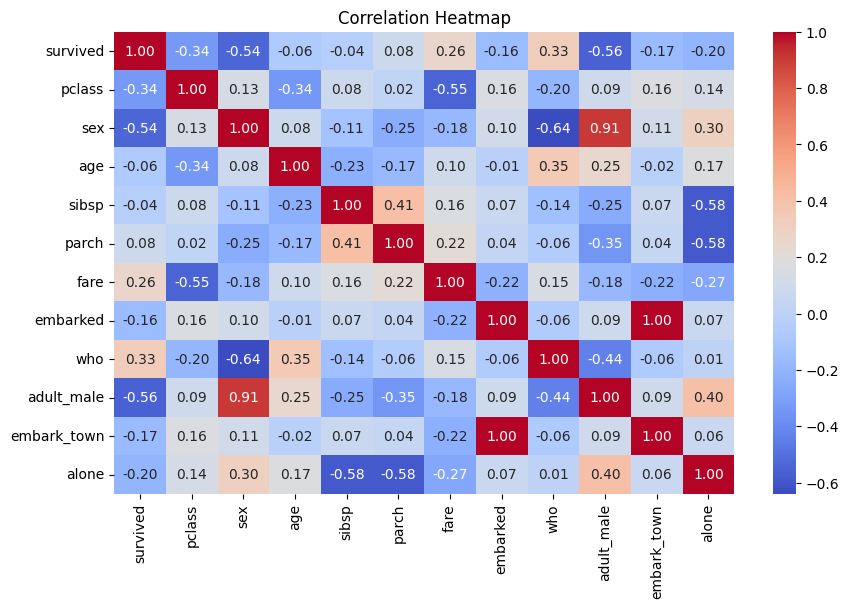

In [17]:
# Correlation heatmap (Ensure all columns are numeric)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Key Insights
print("\nKey Insights:")
print("- Women had a higher survival rate compared to men.")
print("- Younger passengers had better survival chances.")
print("- Higher-class passengers were more likely to survive.")
print("- Logistic Regression predicts survival with moderate accuracy.")


Key Insights:
- Women had a higher survival rate compared to men.
- Younger passengers had better survival chances.
- Higher-class passengers were more likely to survive.
- Logistic Regression predicts survival with moderate accuracy.
